In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [84]:
stocks = ["GME"]
start = "2021-01-01"
end= "2022-01-01"

In [85]:
data = yf.download(stocks, start , end )

[*********************100%***********************]  1 of 1 completed


In [86]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,19.000000,19.100000,17.150000,17.250000,17.250000,10022500
2021-01-05,17.350000,18.080000,17.230000,17.370001,17.370001,4961500
2021-01-06,17.340000,18.980000,17.330000,18.360001,18.360001,6056200
2021-01-07,18.469999,19.450001,18.020000,18.080000,18.080000,6129300
2021-01-08,18.180000,18.299999,17.080000,17.690001,17.690001,6482000
...,...,...,...,...,...,...
2021-12-27,152.000000,152.619995,140.000000,148.309998,148.309998,1613600
2021-12-28,147.500000,157.410004,146.410004,146.460007,146.460007,1331100
2021-12-29,147.850006,155.490005,142.139999,153.929993,153.929993,2037400


In [87]:
close = data.loc[:,"Close"]

In [88]:
data= data.rename(columns=str.lower)

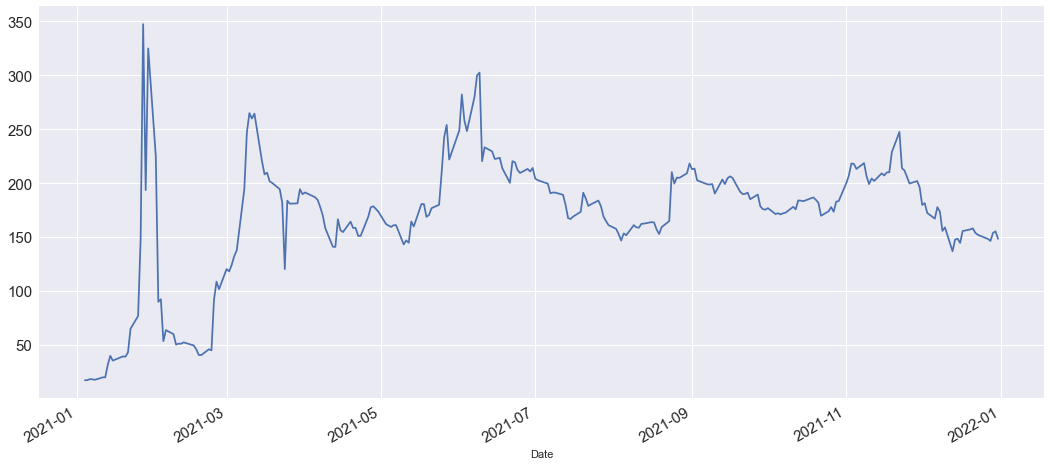

In [89]:
close.plot(figsize = (18, 8), fontsize = 15)
plt.style.use("seaborn")
plt.show()

In [90]:
adj_close_px = data["adj close"]

<AxesSubplot:xlabel='Date'>

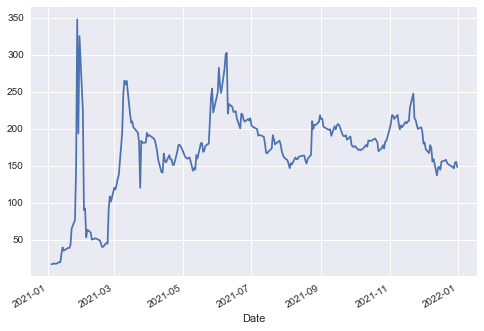

In [91]:
adj_close_px.plot()

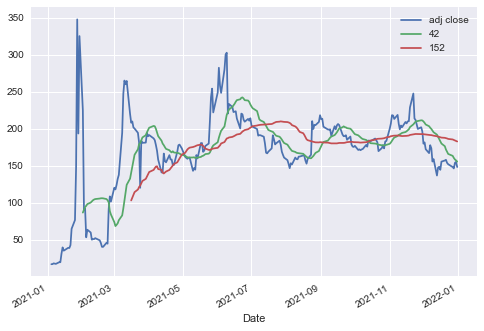

In [116]:
# Short moving window rolling mean
data['20'] = adj_close_px.rolling(window=20).mean()

# Long moving window rolling mean
data['50'] = adj_close_px.rolling(window=50).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
data[['adj close', '42', '152']].plot()

plt.show()

In [117]:
daily_pct_change = data["close"].pct_change()

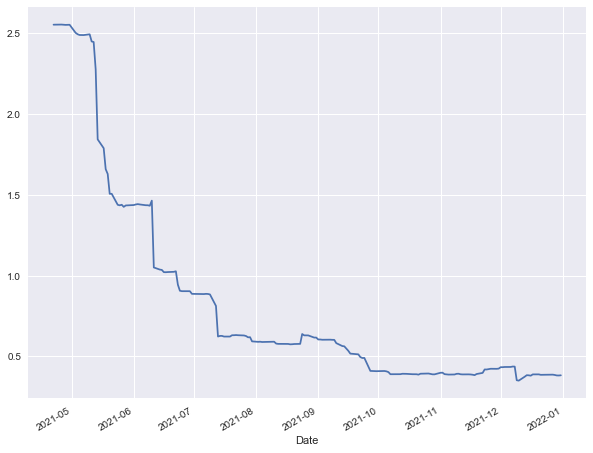

In [118]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [119]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from finta import TA

In [120]:
# Initialize the short and long windows
short_window = 20
long_window = 50

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            < signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

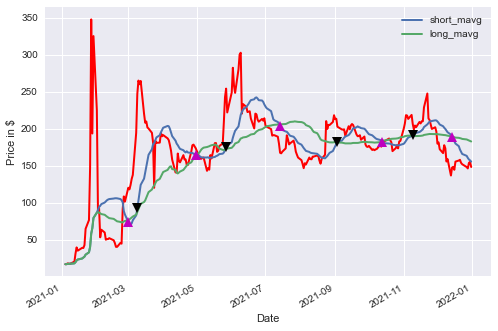

In [121]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
data['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [122]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['GME'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(data['adj close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(data['adj close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(data['adj close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

In [123]:
portfolio

,GME,holdings,cash,total,returns
Date,,,,,
2021-01-04,0.000000,0.000000,100000.00000,100000.000000,NaN
2021-01-05,0.000000,0.000000,100000.00000,100000.000000,0.000000
2021-01-06,0.000000,0.000000,100000.00000,100000.000000,0.000000
2021-01-07,0.000000,0.000000,100000.00000,100000.000000,0.000000
2021-01-08,0.000000,0.000000,100000.00000,100000.000000,0.000000
...,...,...,...,...,...
2021-12-27,14830.999756,14830.999756,111702.00119,126533.000946,-0.003018
2021-12-28,14646.000671,14646.000671,111702.00119,126348.001862,-0.001462
2021-12-29,15392.999268,15392.999268,111702.00119,127095.000458,0.005912


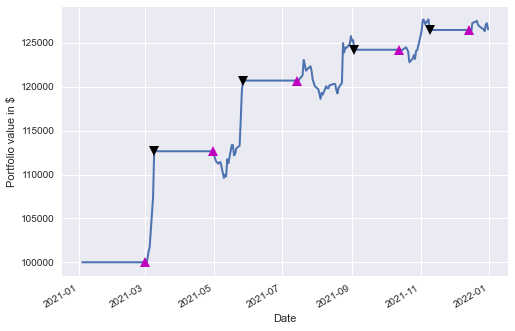

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [125]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

2.268286675246145


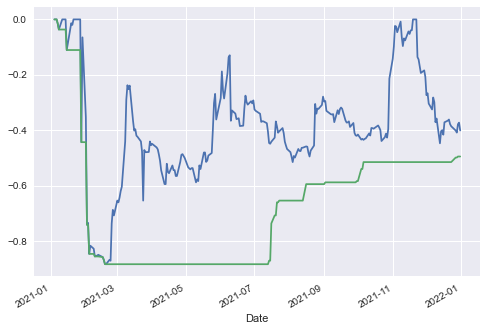

In [126]:
# Define a trailing 100 trading day window
window = 100

# Calculate the max drawdown in the past window days for each day
rolling_max = data['adj close'].rolling(window, min_periods=1).max()
daily_drawdown = data['adj close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [127]:
# Get the number of days in `aapl`
days = (data.index[-1] - data.index[0]).days

# Calculate the CAGR 
cagr = ((((data['adj close'][-1]) / data['adj close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

7.748372855869047
